## 1 задача

1. Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [ ]:
import pandas as pd

In [1]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с  помощью matplotlib

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [2]:
import matplotlib.pyplot as plt

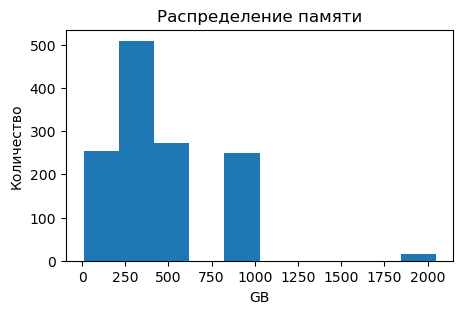

In [3]:
plt.figure(figsize = (5,3))
plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы



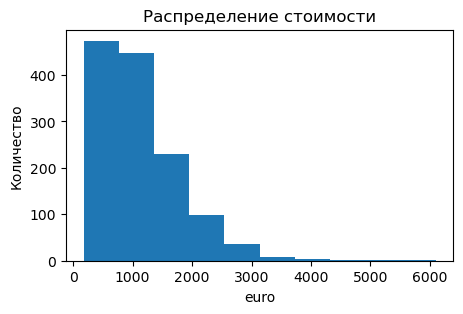

In [4]:
plt.figure(figsize = (5,3))
plt.hist(df['Price_euros'])
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('Количество');

### 1.3 Изучите вес ноутбуков с помощью matplotlib

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

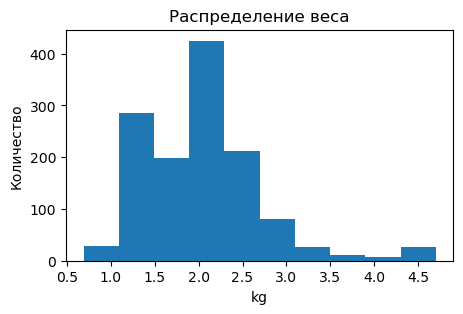

In [5]:
plt.figure(figsize = (5,3))
plt.hist(df['Weight'])
plt.title('Распределение веса')
plt.xlabel('kg')
plt.ylabel('Количество');

## 2 Задача

### 2.1 Изучите распределение типов носителя

- Постройте график
- Сделайте выводы

In [6]:
x = df['Memory_Type'].value_counts()
x

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

Text(0.5, 1.0, 'Доля типов носителей')

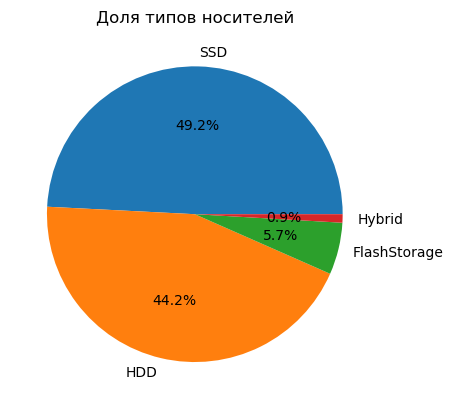

In [7]:
plt.pie(x.values, autopct='%.1f%%', labels=x.index);
plt.title('Доля типов носителей')

### 2.2 Изучите распределение компаний производителей

- Постройте график
- Сделайте выводы

In [8]:
x = df['Company'].value_counts()
x

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

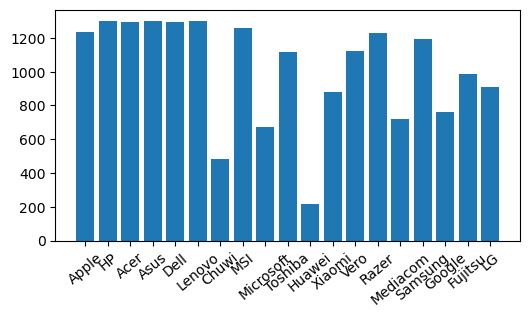

In [9]:
plt.figure(figsize=(6, 3))
plt.bar(df['Company'].values, df['Company'].index)
plt.xticks(rotation=40);

### 2.3 Изучите распределение операционной системы

- Постройте график
- Сделайте выводы

In [10]:
x = df['OpSys'].value_counts()
x

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

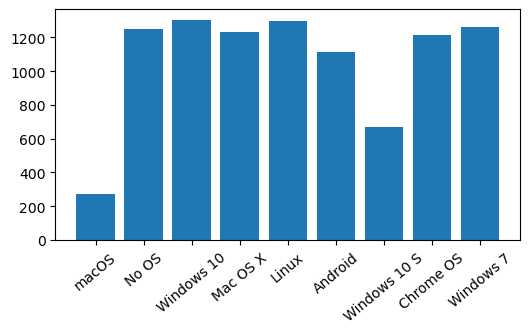

In [11]:
plt.figure(figsize=(6, 3))
plt.bar(df['OpSys'].values, df['OpSys'].index)
plt.xticks(rotation=40);

### 2.4 Изучите распределение компаний производителей CPU

- Постройте график
- Сделайте выводы

In [12]:
x = df['Cpu_Company'].value_counts()
x

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

Text(0.5, 1.0, 'Доля типов носителей')

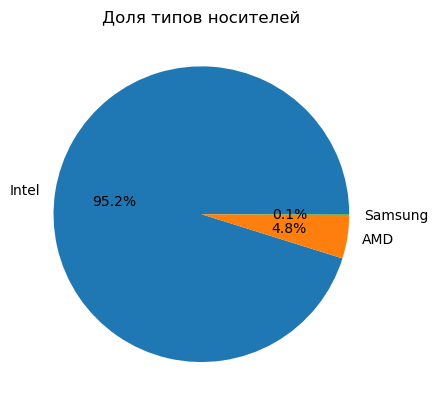

In [13]:
plt.pie(x.values, autopct='%.1f%%', labels=x.index);
plt.title('Доля типов носителей')

## 3 задача

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму


Процессоры от Samsung не изучайте

### 3.1 Постройте график в абсолютных величинах


###### Сложенная столбчатая диаграмма

In [14]:
import numpy as np

In [15]:
x = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
x = x.drop(columns=['Samsung']).reset_index()
x

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


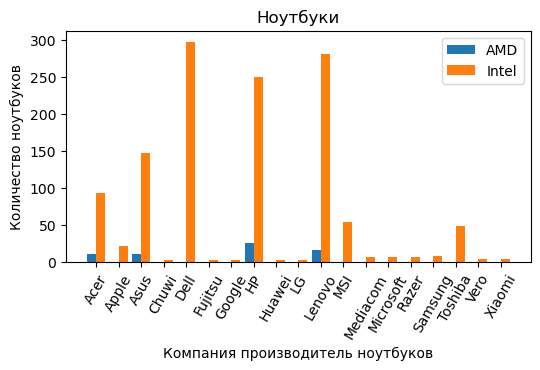

In [16]:
plt.figure(figsize=(6, 3))
offset = 0.2
w = 0.4

n_ticks = np.arange(len(x['AMD']))
plt.bar(n_ticks - offset, x['AMD'], width=w)

plt.bar(n_ticks + offset, x['Intel'], width=w)

plt.xticks(n_ticks, x['Company'], rotation=60); 

plt.title('Ноутбуки')
plt.xlabel('Компания производитель ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])

### 3.2 Постройте график в относительных величинах

###### Многорядовая столбчатая диаграмма

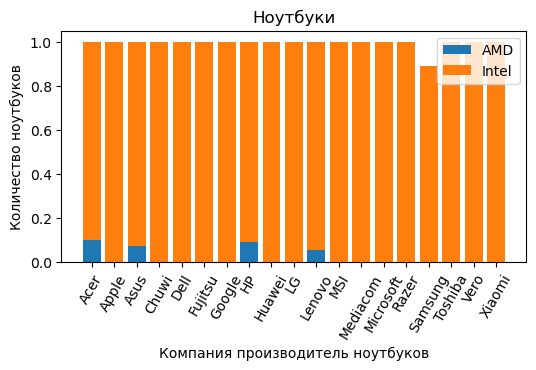

In [17]:
plt.figure(figsize=(6, 3))
x = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize = 'index')
x = x.drop(columns=['Samsung']).reset_index()

offset = 0.2
w = 0.4

n_ticks = np.arange(len(x['AMD']))
plt.bar(x['Company'], x['AMD'])
plt.bar(x['Company'], x['Intel'], bottom=x['AMD'])

plt.xticks(rotation=60); 

plt.title('Ноутбуки')
plt.xlabel('Компания производитель ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])

## 4 задача


### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

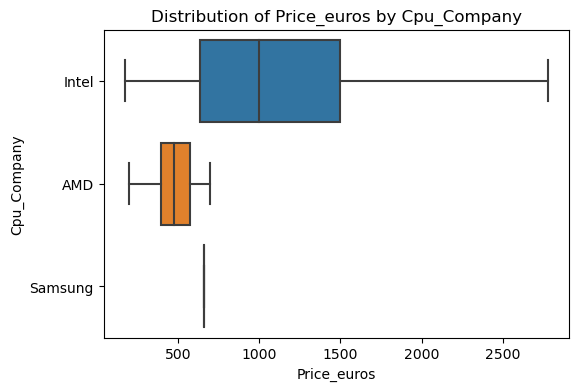

In [18]:
import seaborn as sns

plt.figure(figsize=(6, 4))

# sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis=1.5)   #  с выбросами
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers = False)

plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company')
plt.title('Distribution of Price_euros by Cpu_Company');

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

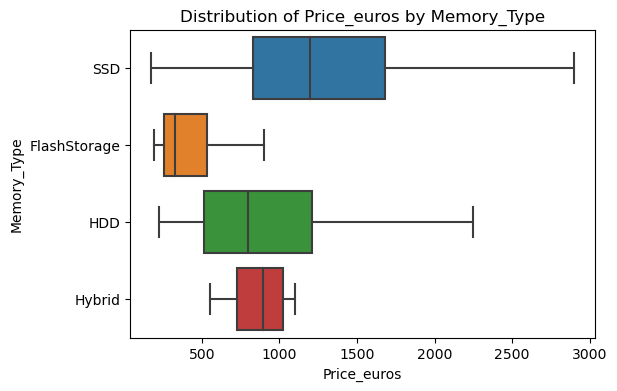

In [19]:
plt.figure(figsize=(6, 4))

# sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5)    #  с выбросами
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'],showfliers = False)

plt.xlabel('Price_euros')
plt.ylabel('Memory_Type')
plt.title('Distribution of Price_euros by Memory_Type');

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

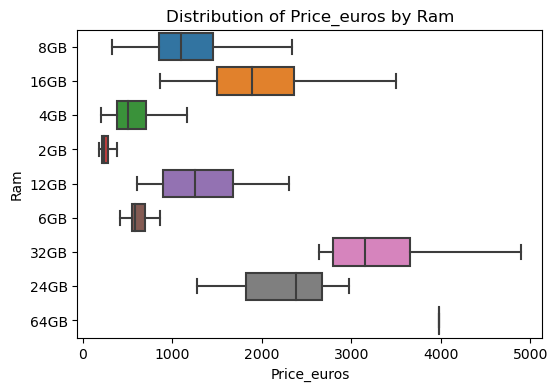

In [20]:
plt.figure(figsize=(6, 4))

# sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis=1.5)    #  с выбросами
sns.boxplot(x=df['Price_euros'], y=df['Ram'].astype(str), showfliers = False)

plt.xlabel('Price_euros')
plt.ylabel('Ram')
plt.title('Distribution of Price_euros by Ram');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

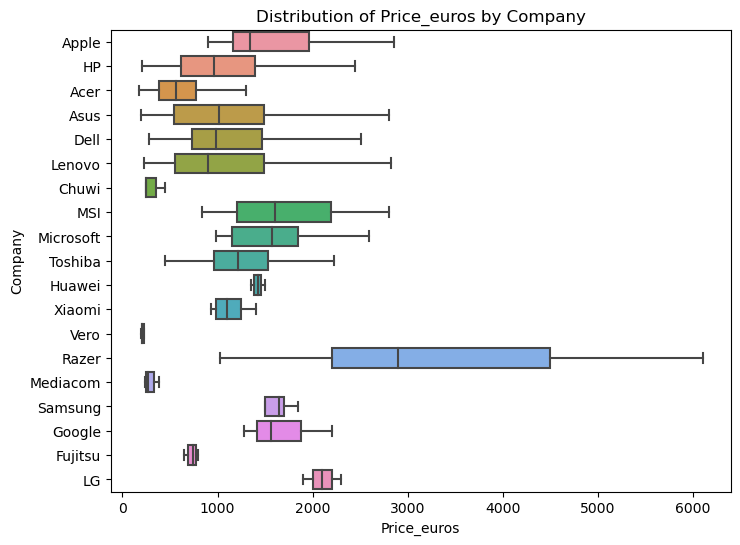

In [21]:
plt.figure(figsize=(8, 6))

# sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5)     #  с выбросами
sns.boxplot(x=df['Price_euros'], y=df['Company'], showfliers = False)

plt.xlabel('Price_euros')
plt.ylabel('Company')
plt.title('Distribution of Price_euros by Company');

## 5 задача*

Постройте матрицу корреляций для таблицы

In [34]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


<Figure size 200x300 with 0 Axes>

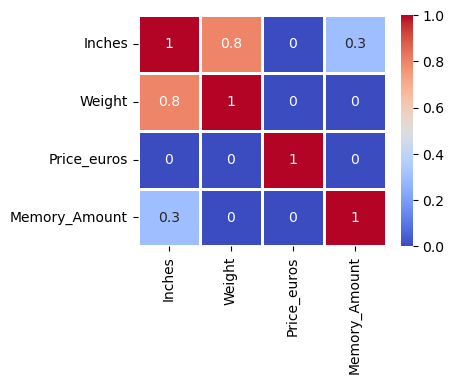

In [38]:
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, linewidths=2, cmap='coolwarm');

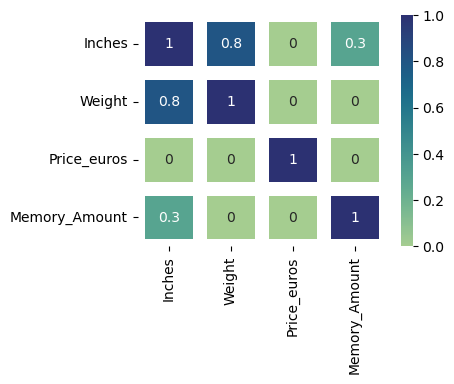

In [40]:
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, linewidths=10, cmap='crest');

### Цвета
- 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

- 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'gist_rainbow', 'rainbow'

- 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'

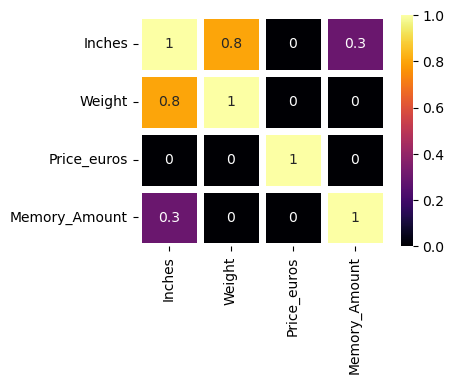

In [43]:
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, linewidths=5, cmap= 'inferno');